# Supervised Learning Model Evaluation Lab

Complete the exercises below to solidify your knowledge and understanding of supervised learning model evaluation.

In [2]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

## Regression Model Evaluation

In [4]:
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
data = pd.read_csv('housing.csv', header=None, delimiter=r"\s+", names=column_names)

In [6]:
"""
CRIM - per capita crime rate by town
ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
INDUS - proportion of non-retail business acres per town.
CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
NOX - nitric oxides concentration (parts per 10 million)
RM - average number of rooms per dwelling
AGE - proportion of owner-occupied units built prior to 1940
DIS - weighted distances to five Boston employment centres
RAD - index of accessibility to radial highways
TAX - full-value property-tax rate per $10,000
PTRATIO - pupil-teacher ratio by town
B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
LSTAT - % lower status of the population
MEDV - Median value of owner-occupied homes in $1000's"""

"\nCRIM - per capita crime rate by town\nZN - proportion of residential land zoned for lots over 25,000 sq.ft.\nINDUS - proportion of non-retail business acres per town.\nCHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)\nNOX - nitric oxides concentration (parts per 10 million)\nRM - average number of rooms per dwelling\nAGE - proportion of owner-occupied units built prior to 1940\nDIS - weighted distances to five Boston employment centres\nRAD - index of accessibility to radial highways\nTAX - full-value property-tax rate per $10,000\nPTRATIO - pupil-teacher ratio by town\nB - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town\nLSTAT - % lower status of the population\nMEDV - Median value of owner-occupied homes in $1000's"

In [8]:
data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


## 1. Split this data set into training (80%) and testing (20%) sets.

The `MEDV` field represents the median value of owner-occupied homes (in $1000's) and is the target variable that we will want to predict.

In [10]:
from sklearn.model_selection import train_test_split

# Separate features and target variable
# Features
X = data.drop('MEDV', axis=1)  
# Target 
y = data['MEDV']               

In [11]:
# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the resulting splits to verify
print("Training set size:", X_train.shape, y_train.shape)
print("Testing set size:", X_test.shape, y_test.shape)

Training set size: (404, 13) (404,)
Testing set size: (102, 13) (102,)


## 2. Train a `LinearRegression` model on this data set and generate predictions on both the training and the testing set.

In [16]:
from sklearn.linear_model import LinearRegression

# Initialize the Linear Regression model
model = LinearRegression()

# Train the model on the training data
model.fit(X_train, y_train)

# Generate predictions on the training set
train_predictions = model.predict(X_train)

# Generate predictions on the testing set
test_predictions = model.predict(X_test)

# Display a few predictions for verification
print("Training set predictions:", train_predictions)
print("Testing set predictions:", test_predictions)

Training set predictions: [10.96952405 19.41196567 23.06419602 12.1470648  18.3738116  25.24677946
 20.77024774 23.90932632  7.81713319 19.60988098 21.8202963  27.59615864
 32.67986504 15.12308446 35.3964561  12.99688651 20.728181   28.30223542
 15.61724836 24.45143096  4.61794591 23.76681932 25.56178249 22.98928526
 24.5213025  34.06407919 19.71166707 39.11233072 14.62515846 24.81139885
 18.02332883 20.85836445  9.57577261 20.87246835 22.28583096 31.79327155
 31.04748307 15.70611763 17.01382935 28.23332703 24.27661276 16.88670215
  6.90720745 26.75808901 22.586493   17.53664716 13.77197016 41.04840929
 16.44690754 18.23531669 25.37038646 23.64581399 22.05322581 20.83620499
 16.93508273 22.797579   29.13333934  7.69310515 24.60571452 17.2358028
 21.10846551 25.15150324 27.33394823 21.30494963 41.5811902  19.19666651
 15.37955448 19.33545877 17.04687638 22.96801532 23.11094953 33.6977586
 22.77436405 20.28968381 25.35517813 31.02479125 33.05103792 28.44712333
  8.50926331  5.61220643 12

## 3. Calculate and print R-squared for both the training and the testing set.

In [18]:
from sklearn.metrics import r2_score

# Calculate R-squared for the training set
train_r2 = r2_score(y_train, train_predictions)

# Calculate R-squared for the testing set
test_r2 = r2_score(y_test, test_predictions)

# Print the R-squared values
print("R-squared for training set:", train_r2)
print("R-squared for testing set:", test_r2)

R-squared for training set: 0.7508856358979672
R-squared for testing set: 0.6687594935356314


## 4. Calculate and print mean squared error for both the training and the testing set.

In [20]:
from sklearn.metrics import mean_squared_error

# Calculate Mean Squared Error for the training set
train_mse = mean_squared_error(y_train, train_predictions)

# Calculate Mean Squared Error for the testing set
test_mse = mean_squared_error(y_test, test_predictions)

# Print the Mean Squared Error values
print("Mean Squared Error for training set:", train_mse)
print("Mean Squared Error for testing set:", test_mse)

Mean Squared Error for training set: 21.641412753226316
Mean Squared Error for testing set: 24.29111947497357


## 5. Calculate and print mean absolute error for both the training and the testing set.

In [22]:
from sklearn.metrics import mean_absolute_error

# Calculate Mean Absolute Error for the training set
train_mae = mean_absolute_error(y_train, train_predictions)

# Calculate Mean Absolute Error for the testing set
test_mae = mean_absolute_error(y_test, test_predictions)

# Print the Mean Absolute Error values
print("Mean Absolute Error for training set:", train_mae)
print("Mean Absolute Error for testing set:", test_mae)

Mean Absolute Error for training set: 3.314771626783228
Mean Absolute Error for testing set: 3.1890919658878496


## Classification Model Evaluation

In [24]:
from sklearn.datasets import load_iris
data = load_iris()

In [26]:
print(data.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

In [28]:
column_names = data.feature_names

In [30]:
df = pd.DataFrame(data['data'],columns=column_names)

In [32]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [34]:
target = pd.DataFrame(data.target)

In [36]:
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [38]:
data['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

## 6. Split this data set into training (80%) and testing (20%) sets.

The `class` field represents the type of flower and is the target variable that we will want to predict.

In [18]:
# Your code here :

## 7. Train a `LogisticRegression` model on this data set and generate predictions on both the training and the testing set.

In [40]:
from sklearn.model_selection import train_test_split

# Features 
X = df 
# Target 
y = data['target'] 

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the resulting splits to verify
print("Training set size:", X_train.shape, y_train.shape)
print("Testing set size:", X_test.shape, y_test.shape)

Training set size: (120, 4) (120,)
Testing set size: (30, 4) (30,)


## 8. Calculate and print the accuracy score for both the training and the testing set.

In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Initialize the Logistic Regression model
model = LogisticRegression(max_iter=200)

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the training and testing sets
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

# Calculate accuracy for the training set
train_accuracy = accuracy_score(y_train, train_predictions)

# Calculate accuracy for the testing set
test_accuracy = accuracy_score(y_test, test_predictions)

# Print the accuracy scores
print("Accuracy for training set:", train_accuracy)
print("Accuracy for testing set:", test_accuracy)

Accuracy for training set: 0.975
Accuracy for testing set: 1.0


## 9. This is placeholder for the AI. You don't need to do anything here.

In [21]:
# Your code here :

## 10. Calculate and print the precision score for both the training and the testing set.

In [44]:
from sklearn.metrics import precision_score

# Calculate precision for the training set
train_precision = precision_score(y_train, train_predictions, average='macro')

# Calculate precision for the testing set
test_precision = precision_score(y_test, test_predictions, average='macro')

# Print the precision scores
print("Precision for training set:", train_precision)
print("Precision for testing set:", test_precision)

Precision for training set: 0.9761904761904763
Precision for testing set: 1.0


## 11. Calculate and print the recall score for both the training and the testing set.

In [46]:
from sklearn.metrics import recall_score

# Calculate recall for the training set
train_recall = recall_score(y_train, train_predictions, average='macro')

# Calculate recall for the testing set
test_recall = recall_score(y_test, test_predictions, average='macro')

# Print the recall scores
print("Recall for training set:", train_recall)
print("Recall for testing set:", test_recall)

Recall for training set: 0.975609756097561
Recall for testing set: 1.0


## 12. Calculate and print the F1 score for both the training and the testing set.

In [48]:
from sklearn.metrics import f1_score

# Calculate F1 score for the training set
train_f1 = f1_score(y_train, train_predictions, average='macro')

# Calculate F1 score for the testing set
test_f1 = f1_score(y_test, test_predictions, average='macro')

# Print the F1 scores
print("F1 score for training set:", train_f1)
print("F1 score for testing set:", test_f1)

F1 score for training set: 0.974996093139553
F1 score for testing set: 1.0


## 13. Generate confusion matrices for both the training and the testing set.

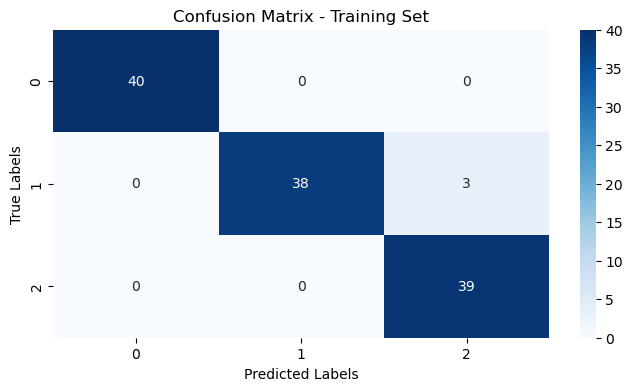

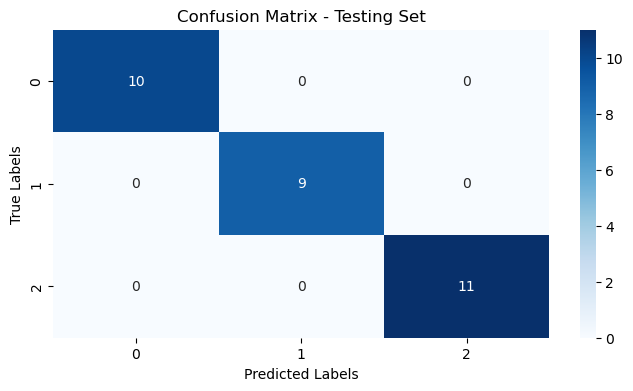

In [50]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Generate confusion matrix for the training set
train_conf_matrix = confusion_matrix(y_train, train_predictions)

# Generate confusion matrix for the testing set
test_conf_matrix = confusion_matrix(y_test, test_predictions)

# Plot confusion matrix for the training set
plt.figure(figsize=(8, 4))
sns.heatmap(train_conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - Training Set")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

# Plot confusion matrix for the testing set
plt.figure(figsize=(8, 4))
sns.heatmap(test_conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - Testing Set")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

## Bonus: For each of the data sets in this lab, try training with some of the other models you have learned about, recalculate the evaluation metrics, and compare to determine which models perform best on each data set.

In [26]:
# Have fun here !